In [1]:
import requests
import io
import datetime

import pandas as pd
import matplotlib.pylab as plt

In [2]:
# https://www.tepco.co.jp/forecast/html/download-j.html
# https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv

YEARS = [2016, 2017, 2018, 2019, 2020, 2021]

INPUT_DIR = "input/"

In [3]:
y = YEARS[1]
df = pd.read_csv(INPUT_DIR + f"juyo-{y}.csv")
df.head()

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389


In [4]:
df.describe()

,実績(万kW)
count,8760.000000
mean,3265.903539
std,622.288107
min,1977.000000
25%,2775.000000
50%,3241.000000
75%,3704.250000
max,5383.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     8760 non-null   object
 1   TIME     8760 non-null   object
 2   実績(万kW)  8760 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 205.4+ KB


In [6]:
df["datetime"] = pd.to_datetime(df["DATE"] + " " + df["TIME"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["TIME"].apply(lambda x: x.split(":")[0]).astype("int")
df["dayofweek"] = df["datetime"].dt.dayofweek # Monday:0 ~ Sunday:6
df["power"] = df["実績(万kW)"] / 100 # GW unit
df = df.set_index("datetime")
df.head()

,DATE,TIME,実績(万kW),year,month,day,hour,dayofweek,power
datetime,,,,,,,,,
2017-01-01 00:00:00,2017/1/1,0:00,2783,2017,1,1,0,6,27.83
2017-01-01 01:00:00,2017/1/1,1:00,2634,2017,1,1,1,6,26.34
2017-01-01 02:00:00,2017/1/1,2:00,2520,2017,1,1,2,6,25.20
2017-01-01 03:00:00,2017/1/1,3:00,2438,2017,1,1,3,6,24.38
2017-01-01 04:00:00,2017/1/1,4:00,2389,2017,1,1,4,6,23.89


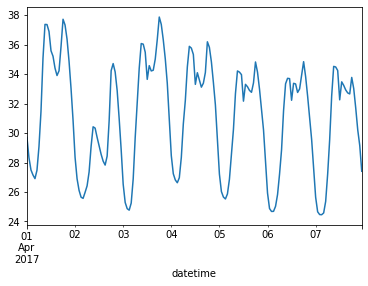

In [7]:
start = datetime.datetime(2017, 4, 1)
end = datetime.datetime(2017, 4, 8)

cond = (df.index >= start) & (df.index < end)

df[cond]['power'].plot()

plt.show()

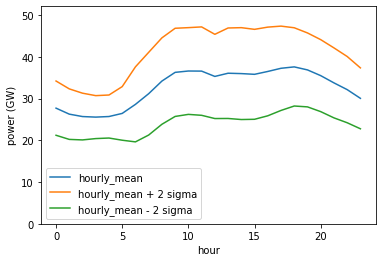

In [8]:
hour_mean = df.groupby("hour").mean()["power"]
hour_std = df.groupby("hour").std()["power"]

hour_mean.plot(label='hourly_mean')
(hour_mean + 2 * hour_std) .plot(label='hourly_mean + 2 sigma')
(hour_mean - 2 * hour_std) .plot(label='hourly_mean - 2 sigma')

plt.legend()
plt.ylim(0, (hour_mean + 2 * hour_std).max() * 1.1)
plt.ylabel('power (GW)')
plt.show()

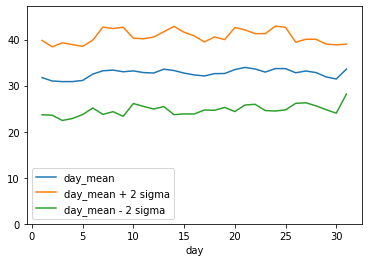

In [9]:
day_mean = df.groupby("DATE").mean().groupby("day").mean()["power"]
day_std = df.groupby("DATE").mean().groupby("day").std()["power"]

day_mean.plot(label='day_mean')
(day_mean + 2 * day_std) .plot(label='day_mean + 2 sigma')
(day_mean - 2 * day_std) .plot(label='day_mean - 2 sigma')

plt.legend()
plt.ylim(0, (day_mean + 2 * day_std).max() * 1.1)
plt.show()

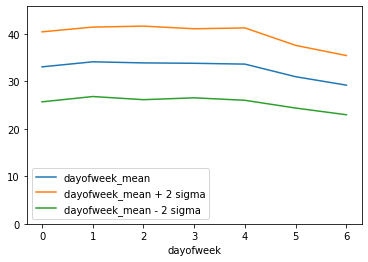

In [10]:
dayofweek_mean = df.groupby("DATE").mean().groupby("dayofweek").mean()["power"]
dayofweek_std = df.groupby("DATE").mean().groupby("dayofweek").std()["power"]

dayofweek_mean.plot(label='dayofweek_mean')
(dayofweek_mean + 2 * dayofweek_std) .plot(label='dayofweek_mean + 2 sigma')
(dayofweek_mean - 2 * dayofweek_std) .plot(label='dayofweek_mean - 2 sigma')


plt.legend()
plt.ylim(0, (dayofweek_mean + 2 * dayofweek_std).max() * 1.1)
plt.show()

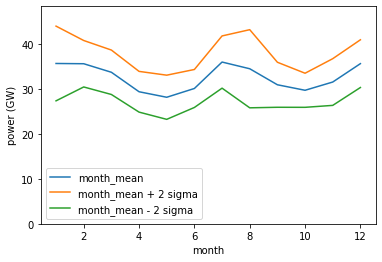

In [11]:
month_mean = df.groupby("DATE").mean().groupby("month").mean()["power"]
month_std = df.groupby("DATE").mean().groupby("month").std()["power"]

month_mean.plot(label='month_mean')
(month_mean + 2 * month_std) .plot(label='month_mean + 2 sigma')
(month_mean - 2 * month_std) .plot(label='month_mean - 2 sigma')

plt.legend()
plt.ylim(0, (month_mean + 2 * month_std).max() * 1.1)
plt.xlabel('month')
plt.ylabel('power (GW)')

plt.show()